In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("merged_data.csv")
df.head()

,ts,humidity1,humidity2,humidity3,humidity4,humidity5,humidity6,humidity7,humidity8,temperature1,temperature2,temperature3,temperature4,temperature5,temperature6,temperature7,temperature8
0,2024-02-01 00:02:02,54.04,53.58,49.96,50.66,48.77,49.92,42.50,48.98,15.57,15.65,17.12,16.79,16.80,16.66,19.10,18.66
1,2024-02-01 00:04:07,52.74,52.43,49.59,50.33,48.95,49.52,42.65,48.73,16.16,16.23,17.17,16.73,16.88,16.95,19.05,18.78
2,2024-02-01 00:06:12,50.39,50.01,49.78,51.23,48.18,48.07,42.66,48.41,16.81,16.92,17.01,16.29,17.05,17.34,18.90,18.80
3,2024-02-01 00:08:17,48.73,48.31,49.61,51.67,47.29,46.64,42.19,47.82,17.17,17.27,16.95,16.04,17.25,17.68,19.02,18.93
4,2024-02-01 00:10:22,48.83,48.38,49.68,52.18,46.62,46.23,41.71,47.52,16.92,17.02,16.77,15.73,17.35,17.65,19.10,18.90


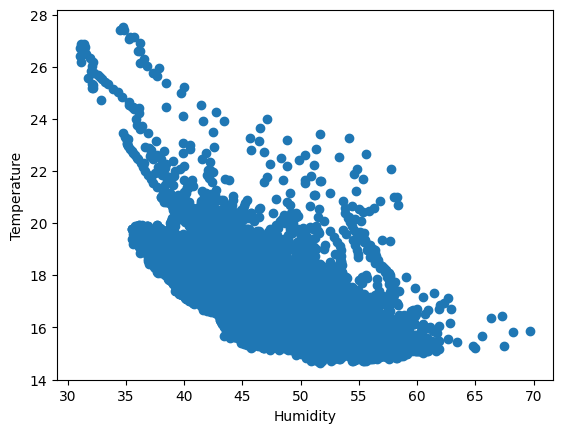

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x = df['humidity1'], y= df['temperature1'])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

In [10]:
# Getting Maximum Value from Humidity1 to Humidity8 and Temperature1 to temperature8

df['Humidity'] = df[['humidity1', 'humidity2', 'humidity3','humidity4','humidity5','humidity6','humidity7','humidity8']].mean(axis=1)

In [11]:
df['Temperature'] = df[['temperature1','temperature2','temperature3','temperature4','temperature5','temperature6','temperature7','temperature8']].mean(axis=1)

In [12]:
df1 = df[['Humidity','Temperature']]
df1.head()

,Humidity,Temperature
0,49.80125,17.04375
1,49.36750,17.24375
2,48.59125,17.39000
3,47.78250,17.53875
4,47.64375,17.43000


In [13]:
df['Temperature'].max()

25.6525

In [14]:
df1['Temperature'].min()

14.7675

<Axes: >

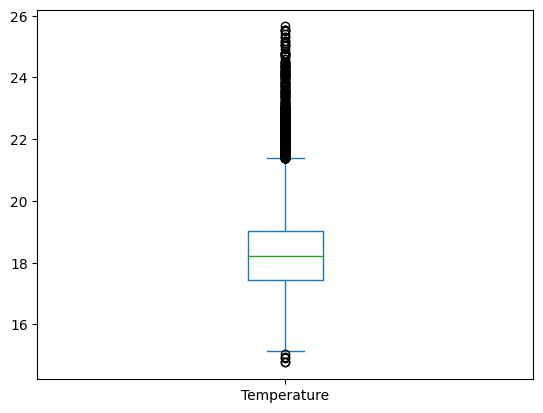

In [15]:
df1['Temperature'].plot(kind='box')

In [16]:
df1 = df1.drop(df.loc[(df1['Temperature'] > 24) | (df1['Temperature']<16)].index)

<Axes: xlabel='Temperature', ylabel='Density'>

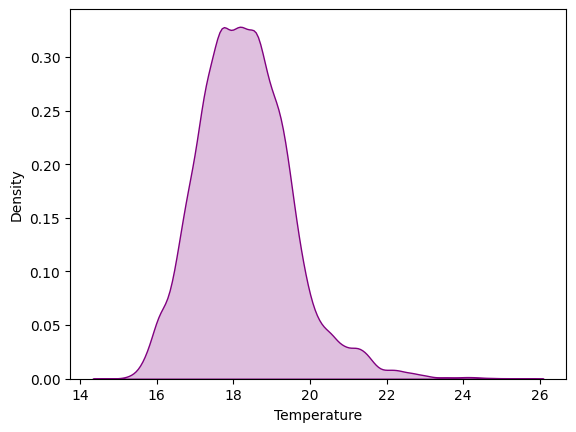

In [17]:
sns.kdeplot(data = df1, x = df['Temperature'],shade = True,color='purple')

In [18]:
def categorize_temperature(temperature):
  if temperature >= 16 and temperature <= 18:
    return "Low"
  elif temperature >= 19 and temperature <= 21 :
    return "Mid"
  else:
    return "High"

df1['Temp_Choice'] = df1['Temperature'].apply(categorize_temperature)
df1.head()


,Humidity,Temperature,Temp_Choice
0,49.80125,17.04375,Low
1,49.36750,17.24375,Low
2,48.59125,17.39000,Low
3,47.78250,17.53875,Low
4,47.64375,17.43000,Low


In [19]:
df1.head()

,Humidity,Temperature,Temp_Choice
0,49.80125,17.04375,Low
1,49.36750,17.24375,Low
2,48.59125,17.39000,Low
3,47.78250,17.53875,Low
4,47.64375,17.43000,Low


In [20]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()
df1['Temp_Choice'] = ore.fit_transform(df1[['Temp_Choice']])


In [21]:
df1['Temp_Choice'].value_counts()

Temp_Choice
1.0    16397
0.0    13629
2.0     8980
Name: count, dtype: int64

In [22]:
df1.head()

,Humidity,Temperature,Temp_Choice
0,49.80125,17.04375,1.0
1,49.36750,17.24375,1.0
2,48.59125,17.39000,1.0
3,47.78250,17.53875,1.0
4,47.64375,17.43000,1.0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df1.iloc[:,[0,2]]
y = df1['Temperature']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [26]:
X_train.head()

,Humidity,Temp_Choice
20654,39.76625,2.0
5275,46.80875,2.0
30246,41.82750,0.0
30384,48.17250,1.0
28701,40.71250,0.0


In [27]:
from sklearn.preprocessing import MinMaxScaler

min = MinMaxScaler()
X_train['Humidity'] = min.fit_transform(X_train[['Humidity']])

In [28]:
X_test['Humidity'] = min.fit_transform(X_test[['Humidity']])

In [29]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [30]:
# Training Accuracy for Linear Regression


from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

y_pred_train = model_lr.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("RMSE",root_mean_squared_error(y_train,y_pred_train))

R2_Score 0.4555580404295909
MAE 0.6286313190838883
RMSE 0.8626988700472954


In [31]:
y_pred_Lr = model_lr.predict(X_test)
print('R2_Score',r2_score(y_test,y_pred_Lr))
print('MAE',mean_absolute_error(y_test,y_pred_Lr))
print("RMSE",root_mean_squared_error(y_test,y_pred_Lr))

R2_Score 0.3950978639255608
MAE 0.6701106942721241
RMSE 0.9238839539574317


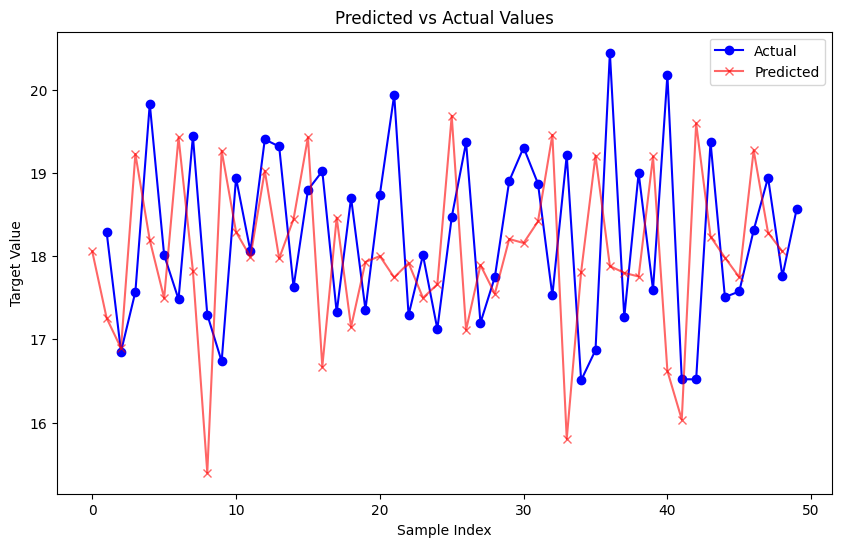

In [32]:
# Plot for Linear Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_Lr[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr_s = GradientBoostingRegressor()



In [34]:
model_gbr_s.fit(X_train,y_train)

GradientBoostingRegressor()

In [35]:
y_pred_train = model_gbr_s.predict(X_train)
print('R2_Score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print("RMSE",root_mean_squared_error(y_train,y_pred_train))

R2_Score 0.8024673319075228
MAE 0.34945688897937704
RMSE 0.5196403898246565


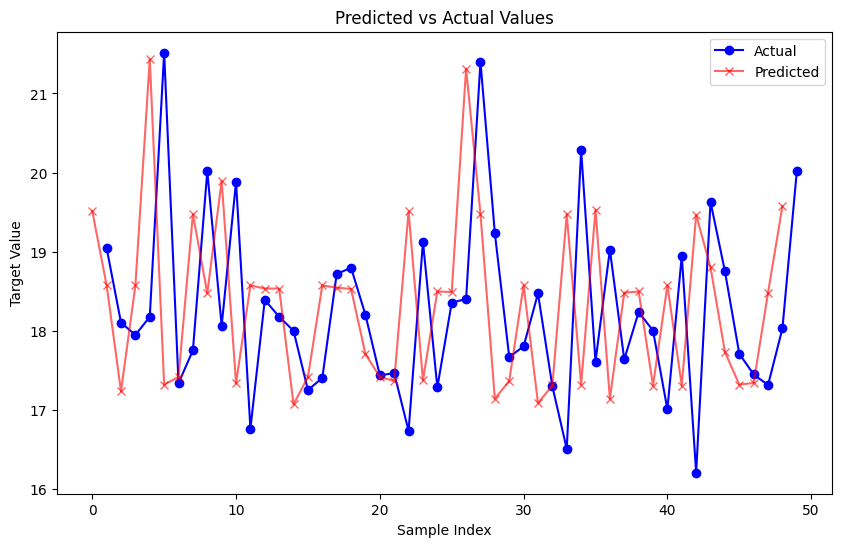

In [36]:
# Training Dataset Graph

# Plot for Linear Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_train.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_train[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [37]:
# Testing Accuracy 

y_pred_test = model_gbr_s.predict(X_test)
print('R2_Score',r2_score(y_test,y_pred_test))
print('MAE',mean_absolute_error(y_test,y_pred_test))
print("RMSE",root_mean_squared_error(y_test,y_pred_test))

R2_Score 0.77998689474093
MAE 0.3720593417968731
RMSE 0.5571846463797271


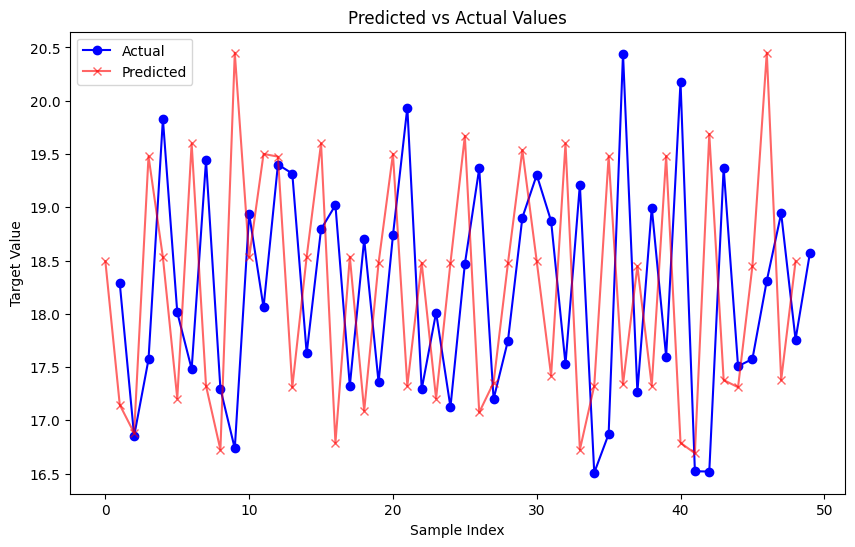

In [38]:
# Training Dataset Graph

# Plot for Linear Regression model between Actual values and predicted values for first 50 values of y_test 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(y_test.reset_index(drop=True)[1:50], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(y_pred_test[1:50], label='Predicted', color='red', alpha=0.6, marker='x')

plt.title('Predicted vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [55]:
import joblib

joblib.dump(model_gbr_s,"model_gbr_s.joblib")

['model_gbr_s.joblib']

In [39]:
Humidity = 46.5
Temp_Choice = 0 # 0-Mid 1-Low 2-High 
predict = model_gbr_s.predict([[Humidity, Temp_Choice]])
print(predict)

[19.58393371]


In [56]:
import pyowm

owm = pyowm.OWM("cbf37349dcb5ddf818d16aece7a0adc3")
weatehr_mrg = owm.weather_manager()
place = input("Enter the City Name")
observation = weatehr_mrg.weather_at_place(place)

In [57]:
temperature = observation.weather.temperature("celsius")["temp"]
humidity = observation.weather.humidity
print(humidity)

83


In [64]:
humidity = observation.weather.humidity
col1_data_option = ["Low(16-18)","Mid(19-21)",'High(22-24)']

if col1_data_option == "Low(16-18)":
    Temp_Choice = 1
    predict = model_gbr_s.predict([[humidity, Temp_Choice]])
    print(predict)
elif col1_data_option == "Mid(19-21)":
    Temp_Choice = 0
    predict = model_gbr_s.predict([[humidity, Temp_Choice]])
    print(predict)
else:
    Temp_Choice = 2
    predict = model_gbr_s.predict([[humidity, Temp_Choice]])
    print(predict)

[19.62885207]
